Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 21 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Year                                                       31 non-null     int64  
 1   Energy from renewable & waste sources                      31 non-null     float64
 2   Total energy consumption of primary fuels and equivalents  31 non-null     float64
 3   Fraction from renewable sources and waste                  31 non-null     float64
 4   Hydroelectric power                                        31 non-null     float64
 5   Wind, wave, tidal                                          31 non-null     float64
 6   Solar photovoltaic                                         31 non-null     float64
 7   Geothermal aquifers                                        31 non-null     float64
 8   L

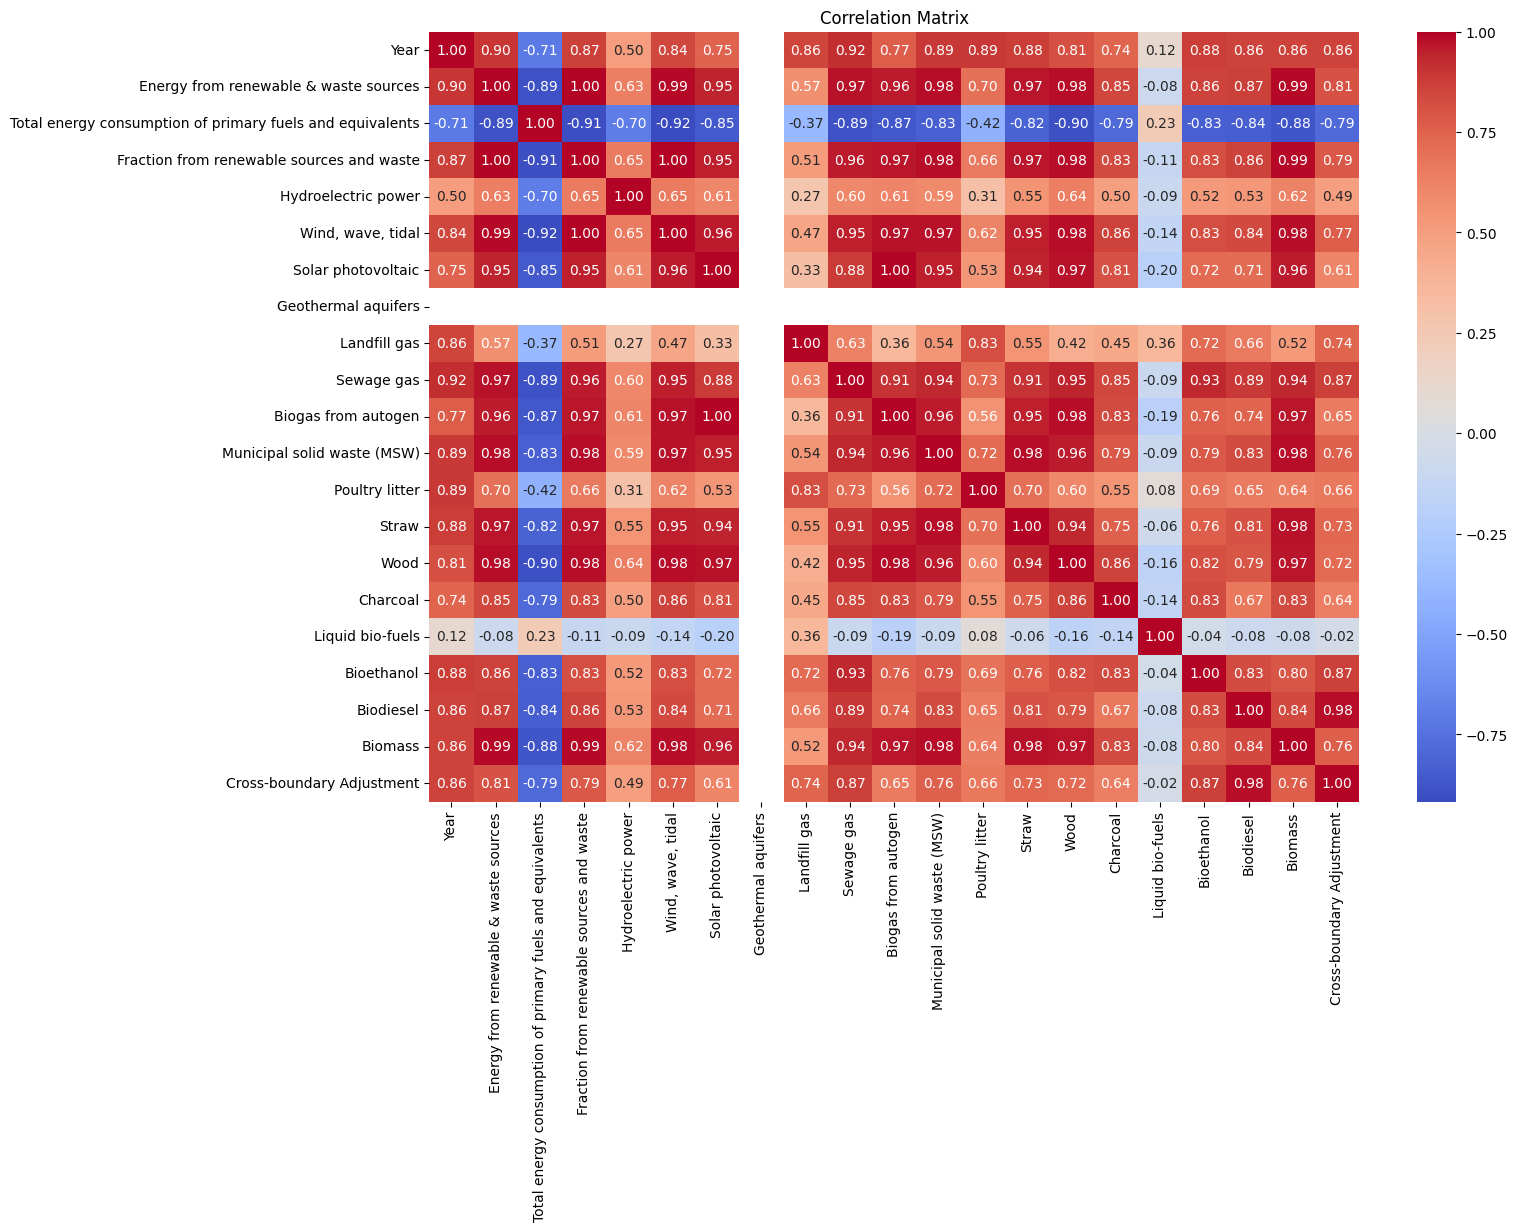

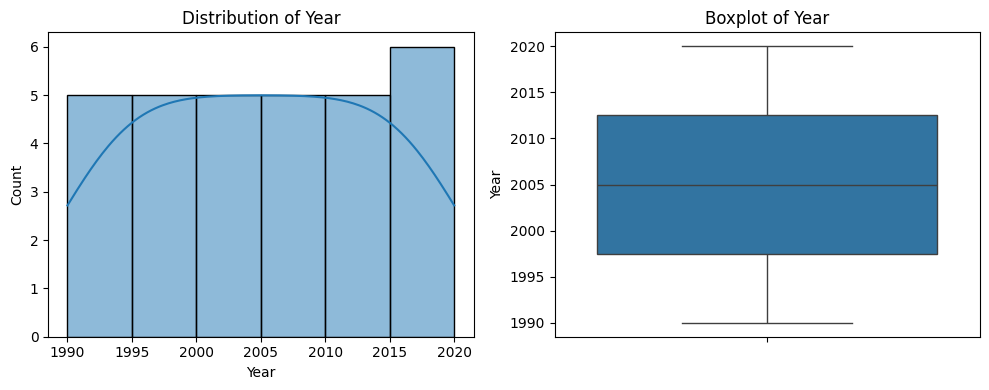

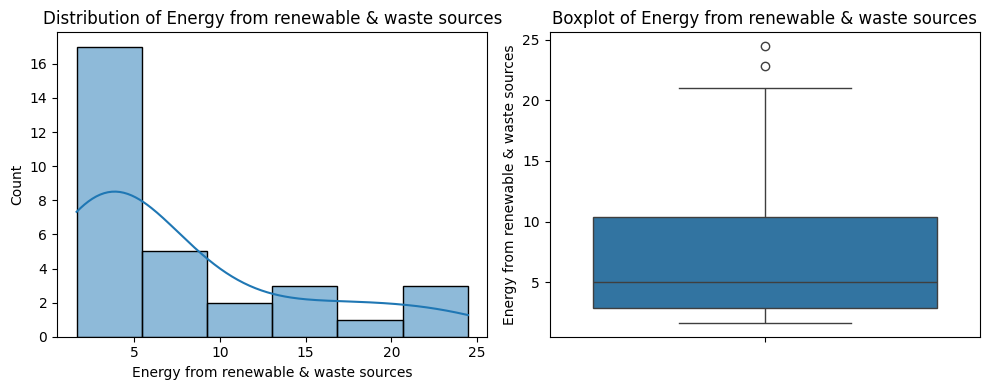

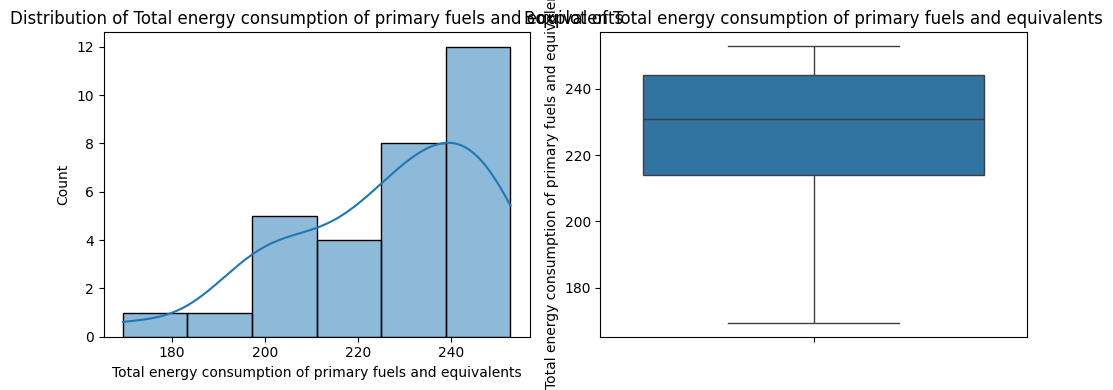

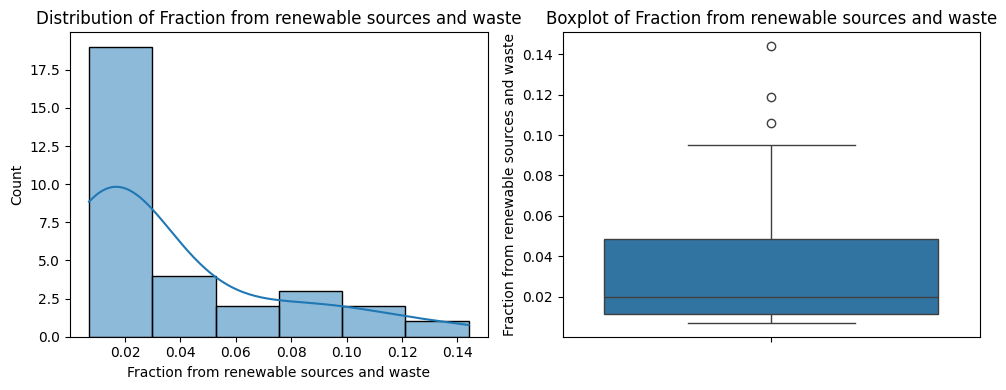

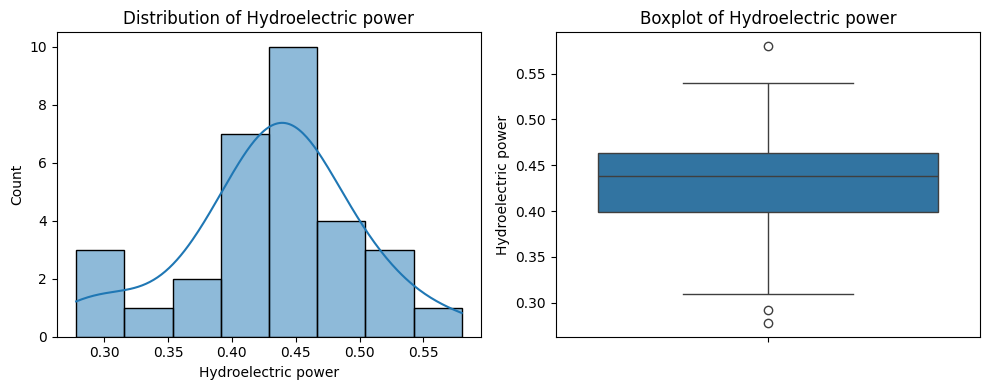

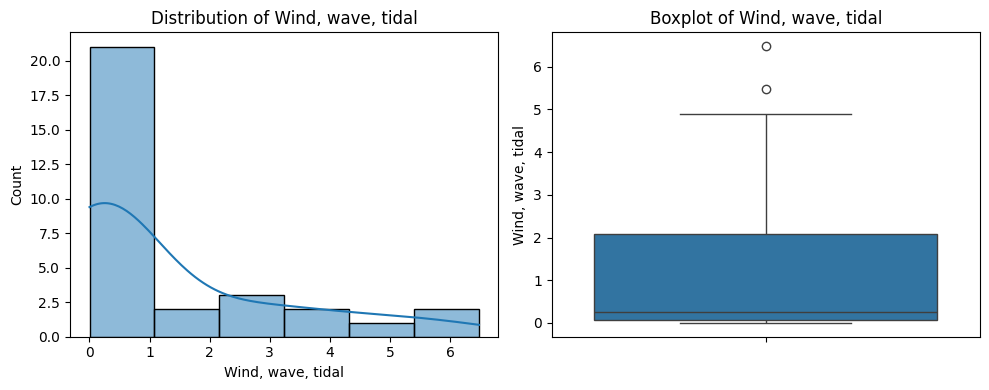

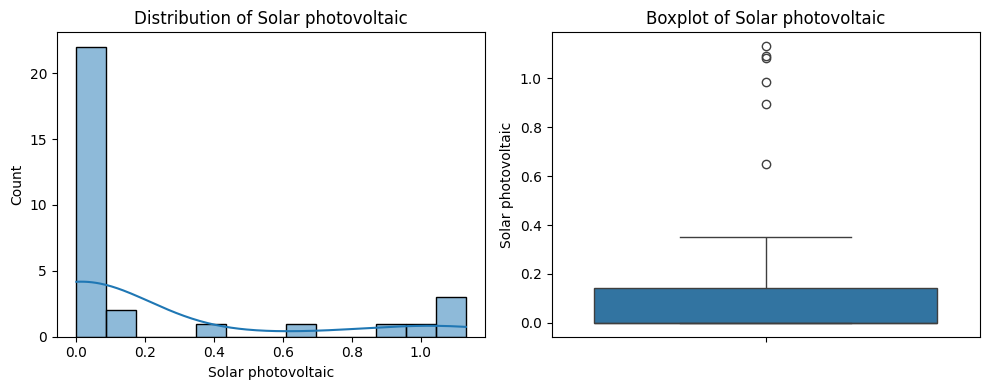

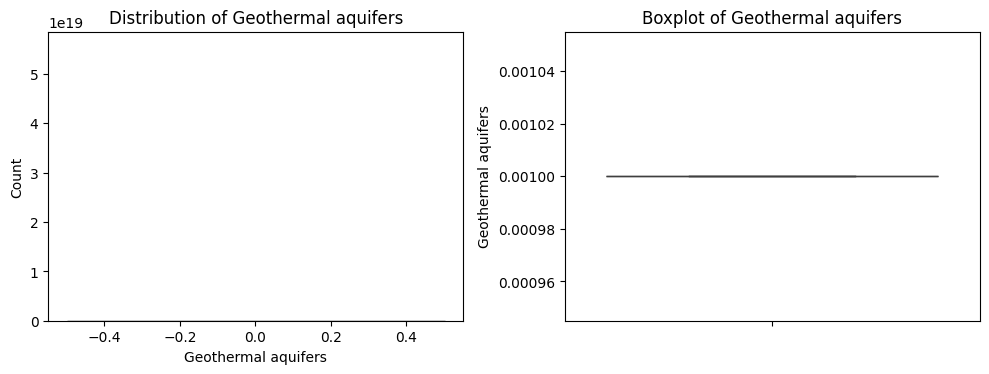

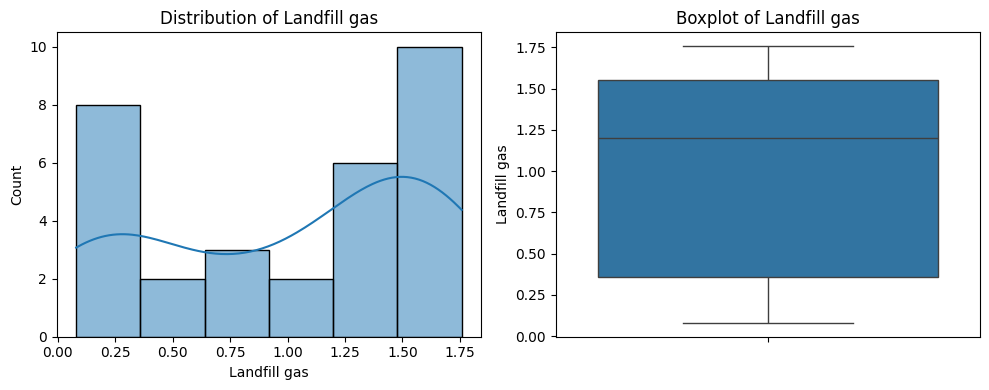

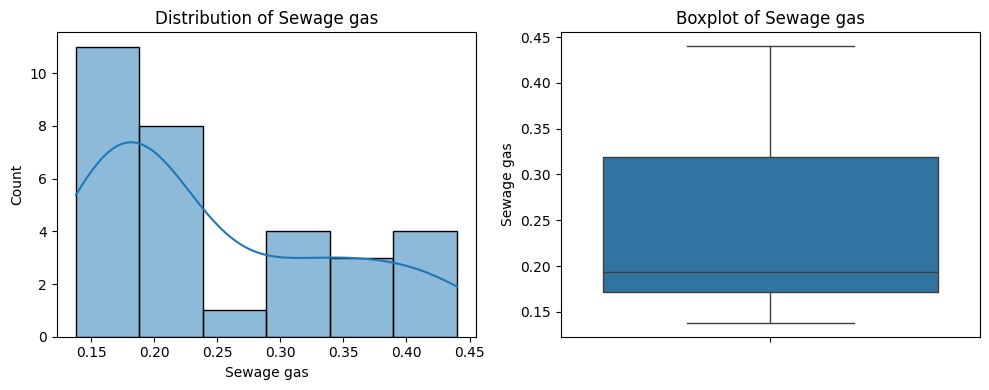

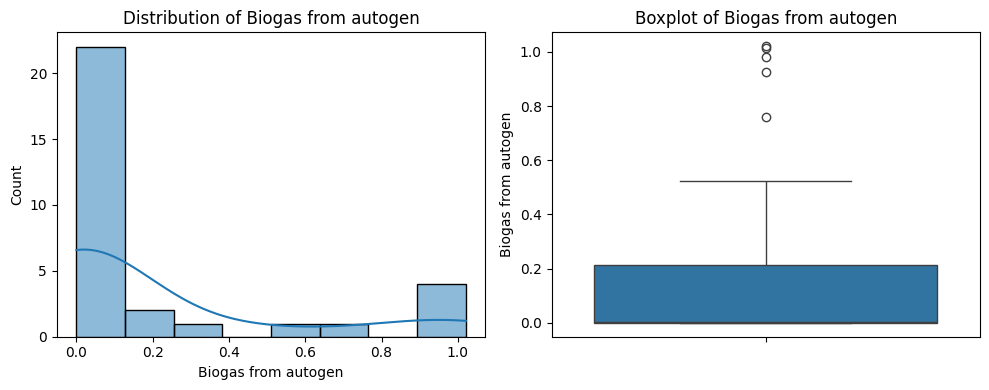

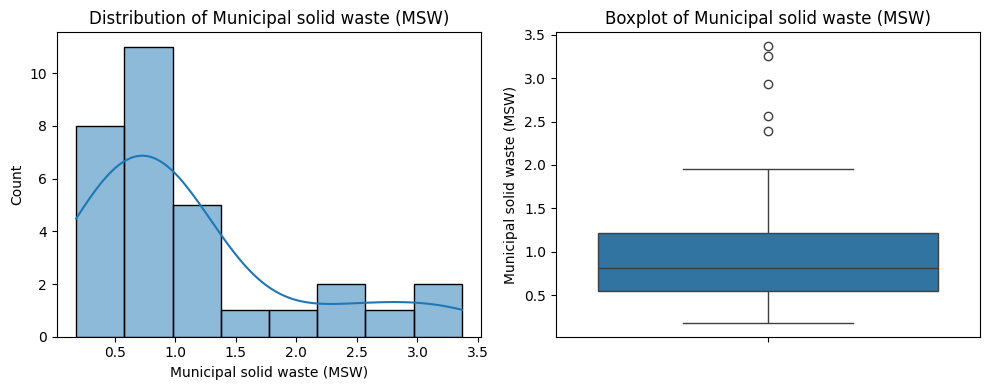

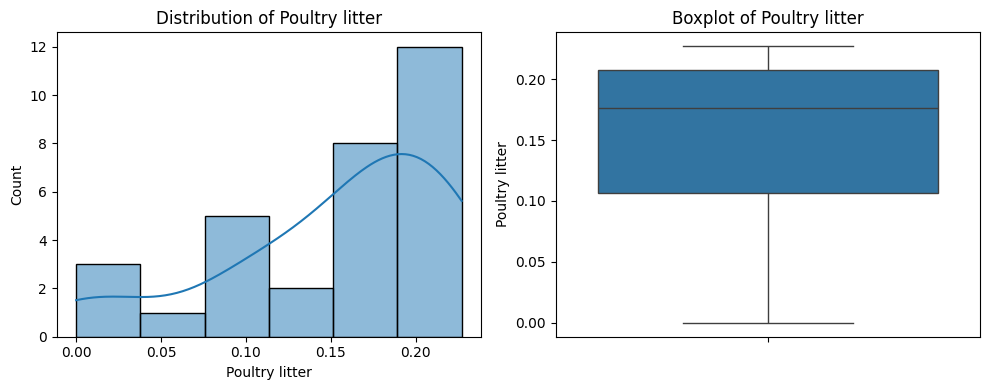

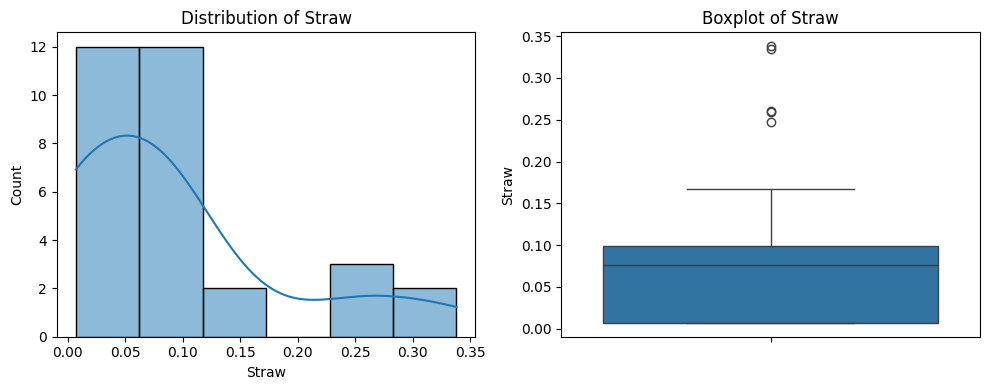

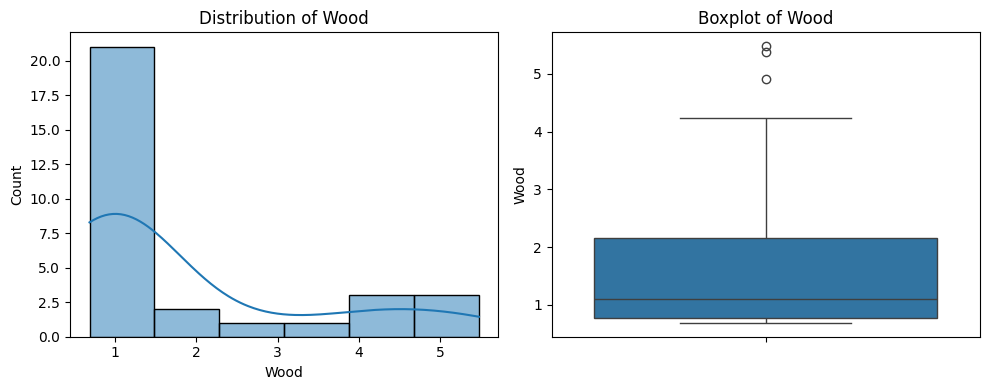

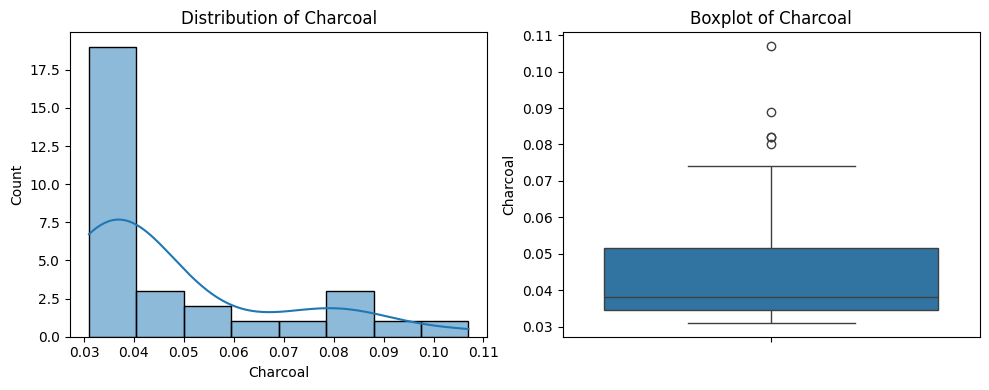

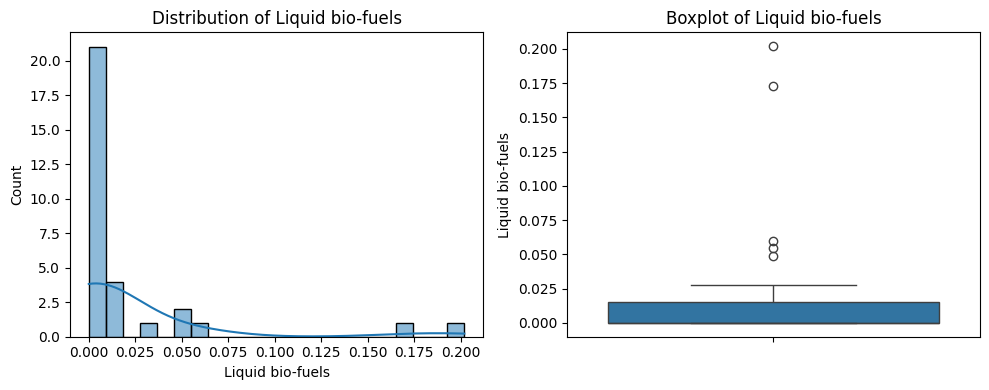

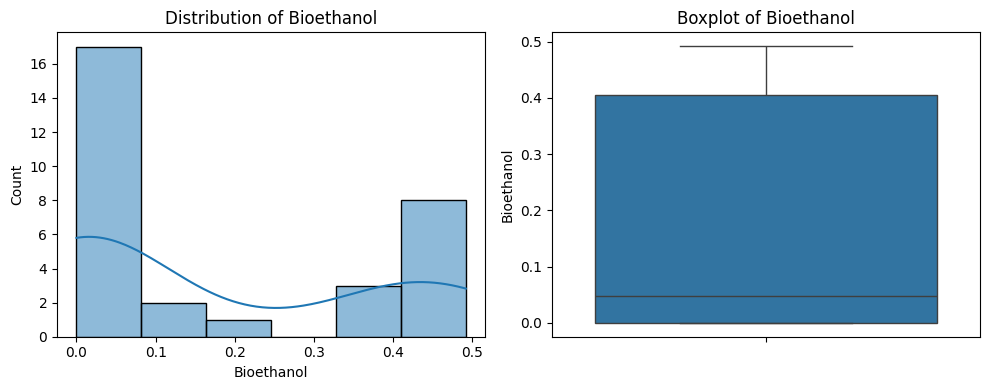

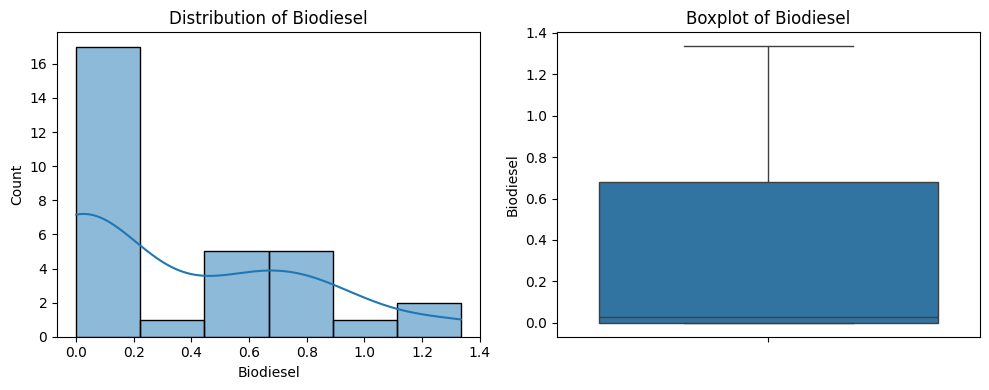

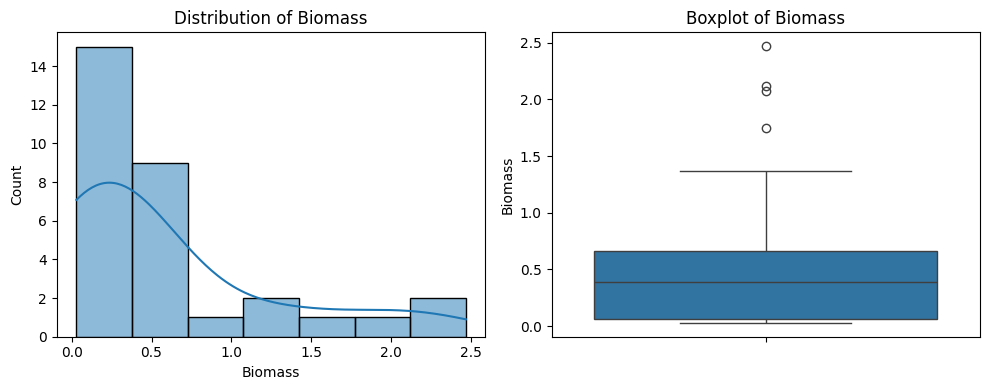

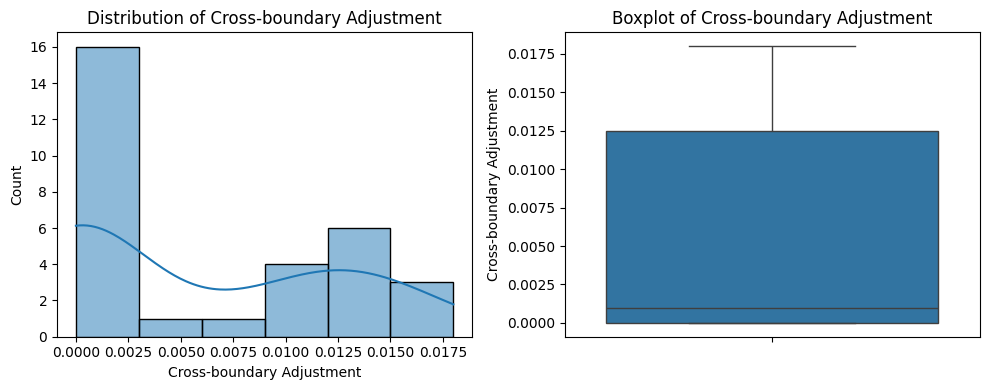

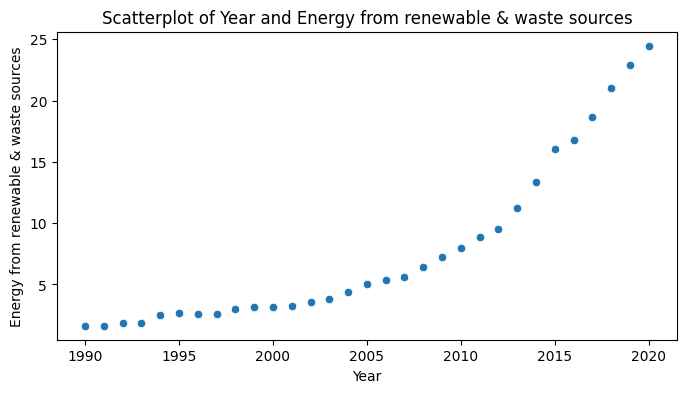

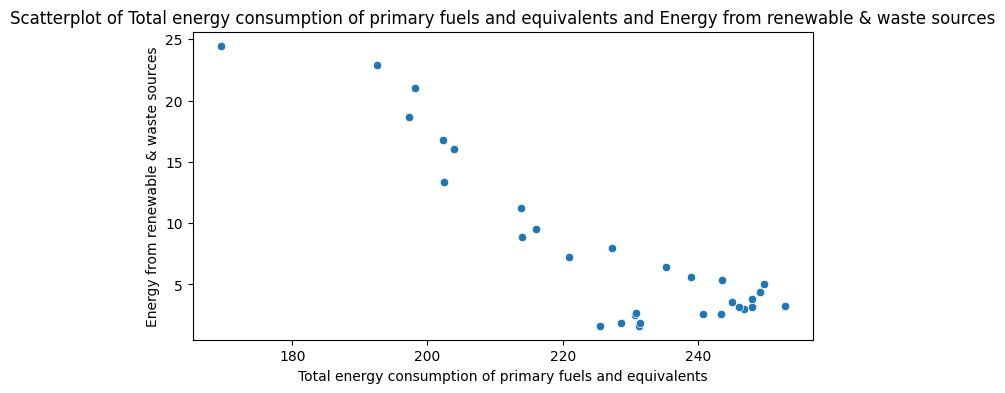

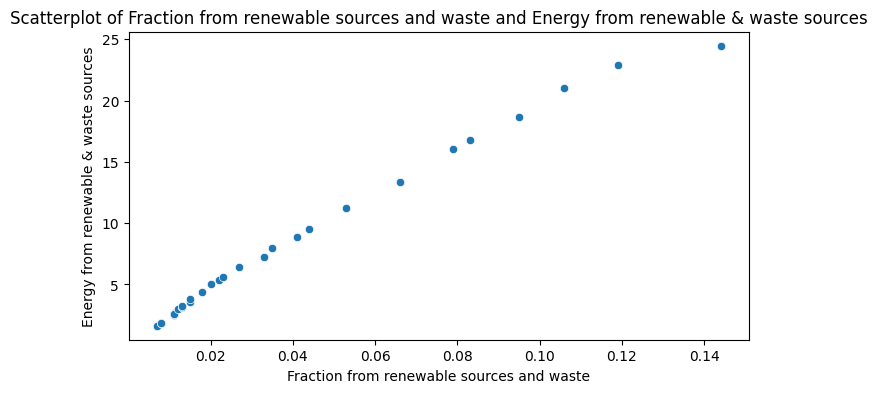

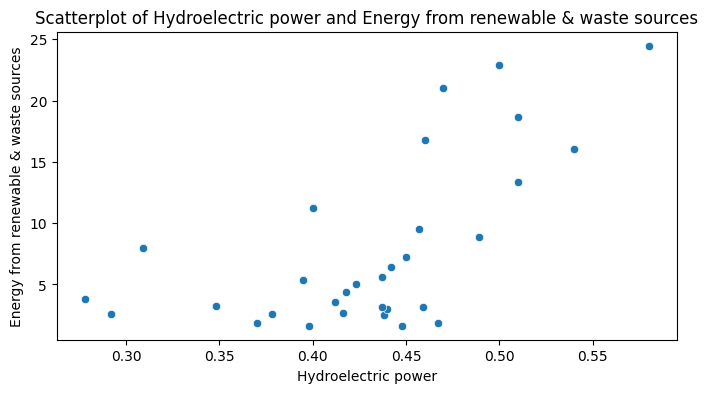

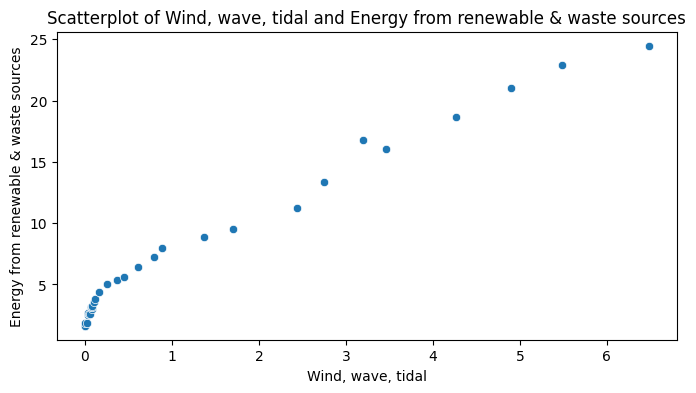

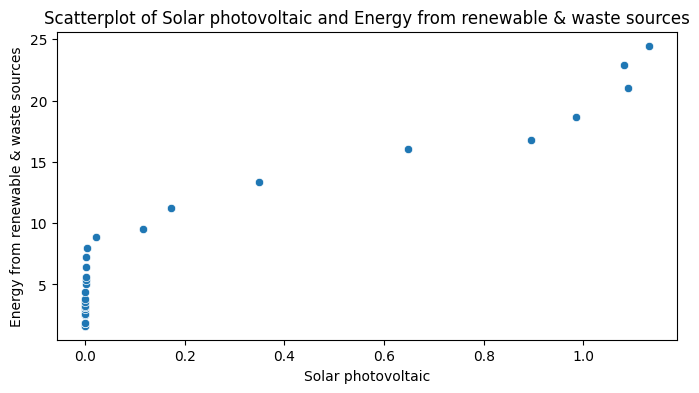

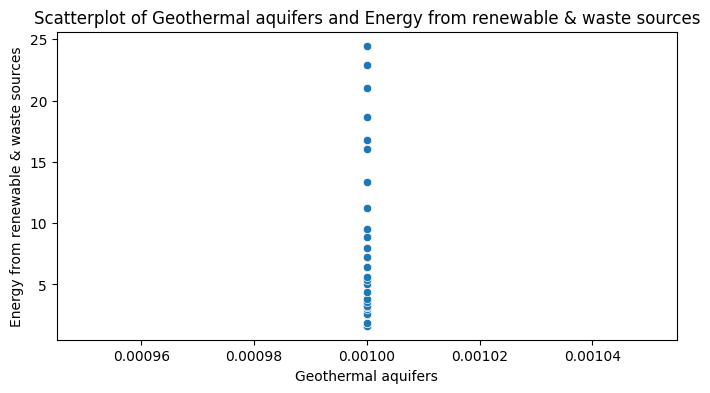

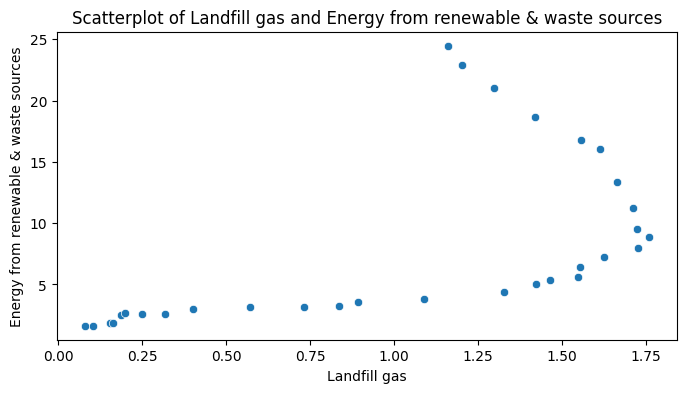

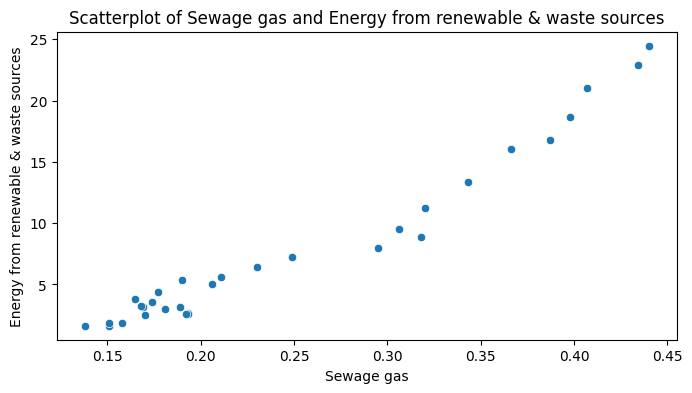

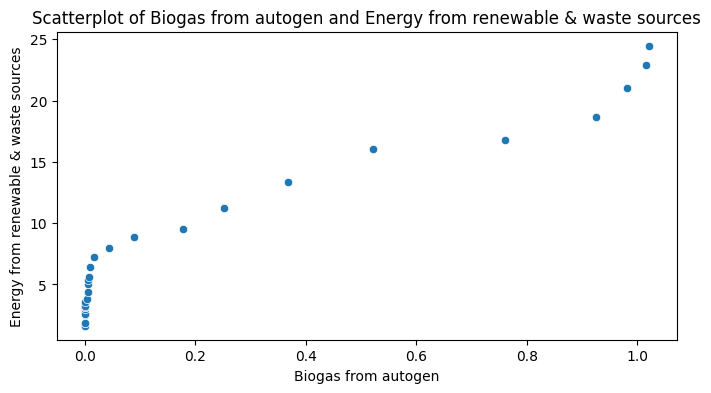

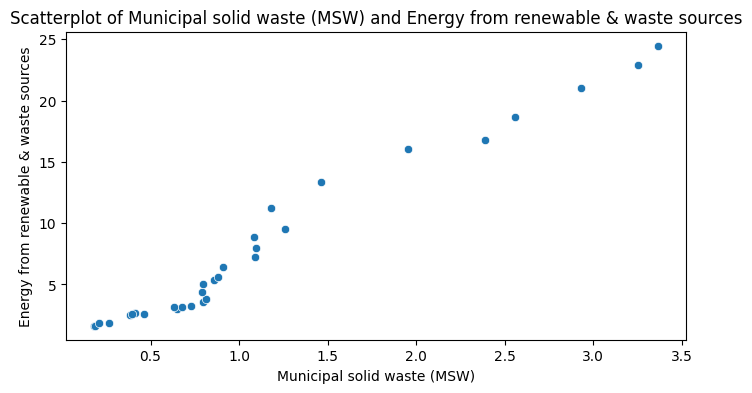

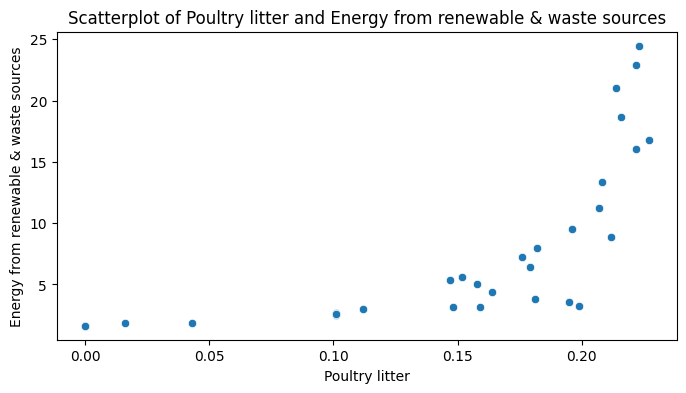

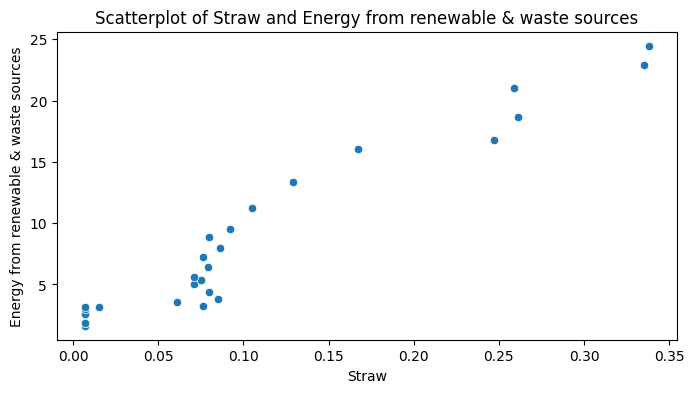

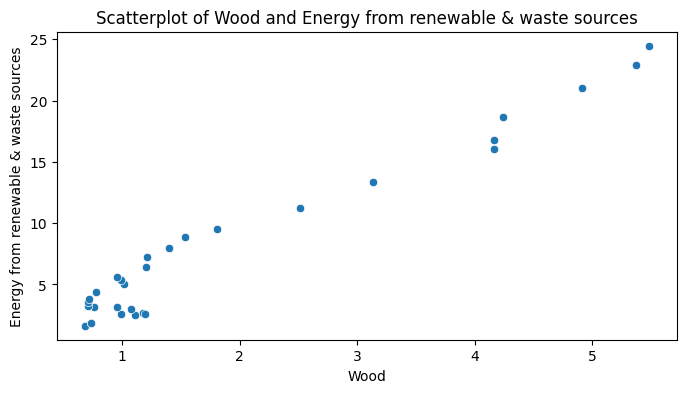

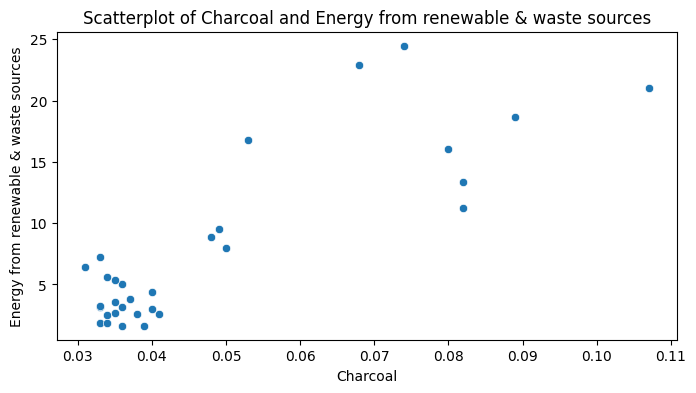

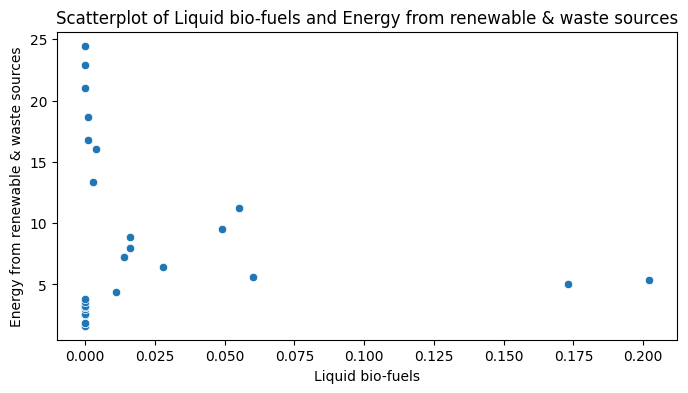

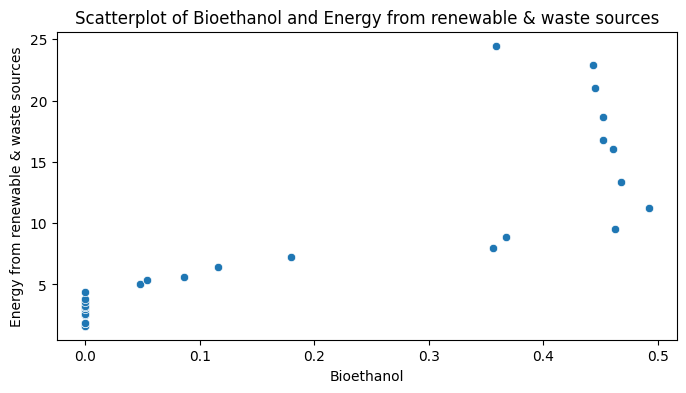

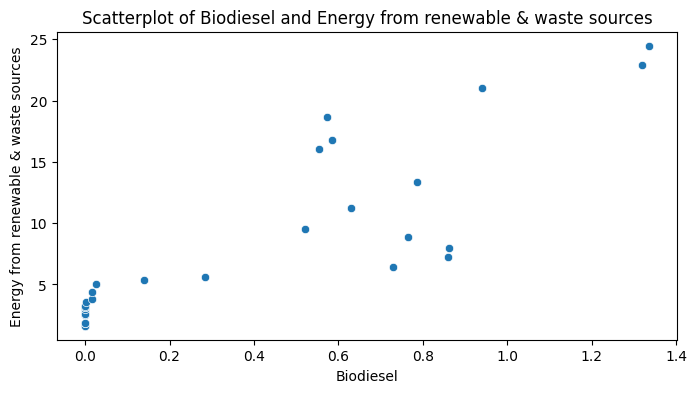

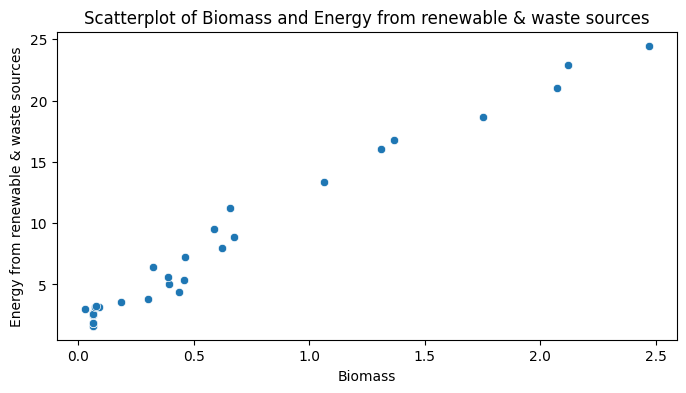

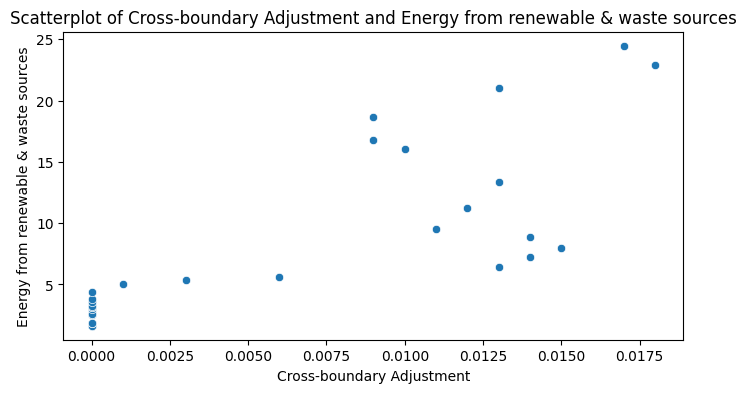

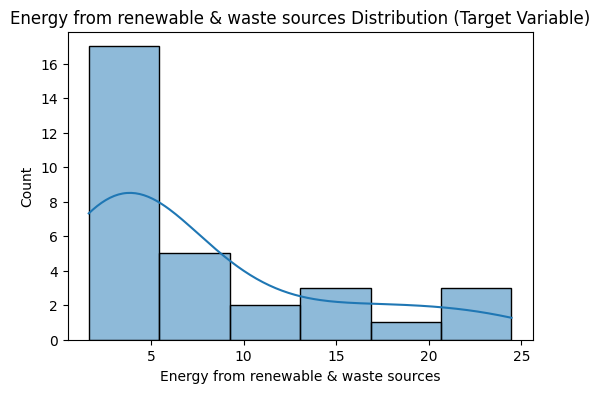

Mean Squared Error: 36.6120
R-squared value: 0.3294
Train MSE: 18.8035
Train R-squared: 0.5386


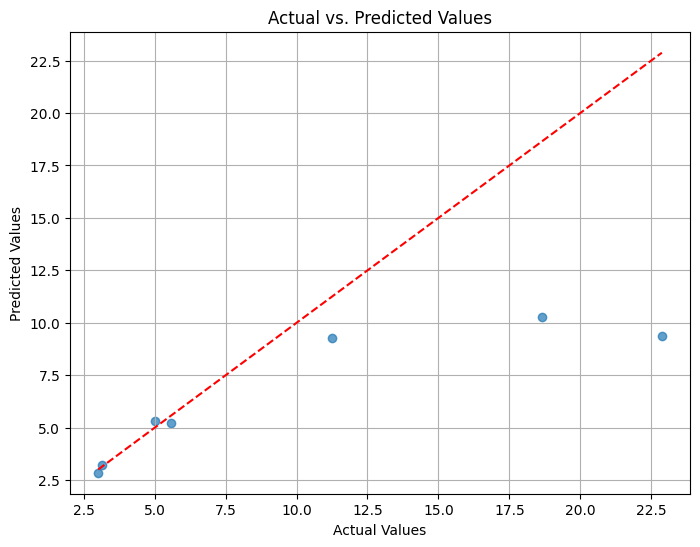

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.01, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.01, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......C=0.1, epsilon=0.01, gamma=0.1,

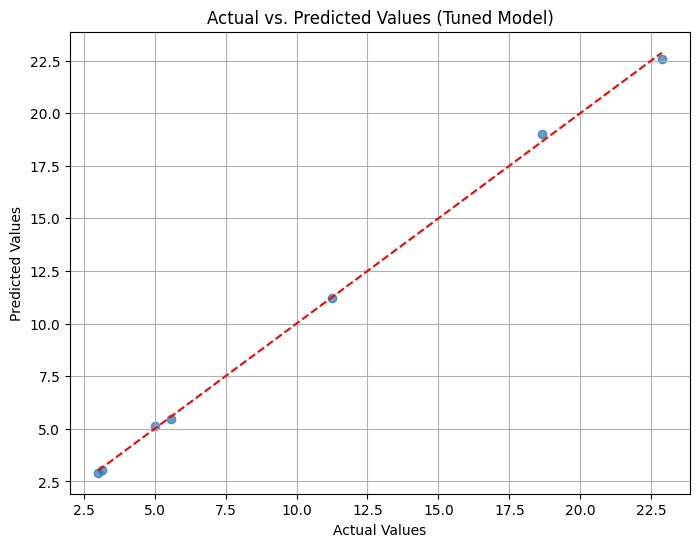

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load data
df = pd.read_csv('/content/drive/MyDrive/Data_set/ML project/uk_renewable_energy.csv')

# Data Exploration and Cleaning
print("Data Info:")
df.info()
print("\nDescriptive Statistics:")
print(df.describe())

# Missing values check
print("\nMissing values check:")
print(df.isnull().sum())

# Value counts for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")


# Correlation Matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Univariate Analysis (Histograms, Boxplots)
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[column])
        plt.title(f'Boxplot of {column}')
        plt.tight_layout()
        plt.show()

# Bivariate Analysis
for col in df.select_dtypes(include=['int64','float64']).columns:
    if col != 'Energy from renewable & waste sources':
        plt.figure(figsize = (8,4))
        sns.scatterplot(x=col, y='Energy from renewable & waste sources', data=df)
        plt.title(f'Scatterplot of {col} and Energy from renewable & waste sources')
        plt.show()

# Target Variable Distribution
plt.figure(figsize=(6,4))
sns.histplot(x='Energy from renewable & waste sources', data=df, kde=True)
plt.title('Energy from renewable & waste sources Distribution (Target Variable)')
plt.show()

# Prepare data for model
X = df.drop(['Year','Energy from renewable & waste sources'], axis=1)
y = df['Energy from renewable & waste sources']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Model
svm_model = SVR()

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2:.4f}")

# Evaluate train model
y_train_pred = svm_model.predict(X_train_scaled)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"Train MSE: {train_mse:.4f}")
print(f"Train R-squared: {train_r2:.4f}")


# Plot Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # diagonal line
plt.grid(True)
plt.show()


# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 0.1, 1],
    'epsilon': [0.01, 0.1, 1],
}

grid_search = GridSearchCV(SVR(), param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters found: {grid_search.best_params_}")

# Retrain with the best parameters
best_svm_model = SVR(**grid_search.best_params_)
best_svm_model.fit(X_train_scaled, y_train)
y_pred_best = best_svm_model.predict(X_test_scaled)

# Evaluate the best model
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
print(f"Best Model MSE: {best_mse:.4f}")
print(f"Best Model R-squared: {best_r2:.4f}")

y_train_pred_best = best_svm_model.predict(X_train_scaled)
best_train_mse = mean_squared_error(y_train, y_train_pred_best)
best_train_r2 = r2_score(y_train, y_train_pred_best)
print(f"Best Train MSE: {best_train_mse:.4f}")
print(f"Best Train R-squared: {best_train_r2:.4f}")


# Plot Predictions of Tuned Model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Tuned Model)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # diagonal line
plt.grid(True)
plt.show()

# Project conclusion: Discuss findings, limitations and potential improvements.